In [1]:
import pandas as pd
import os
import numpy as np
import datetime as dt     
import re
import seaborn as sns
import matplotlib.pyplot as plt

pwd = os.getcwd()
city = 'boston'
listings = pd.read_csv(pwd + '/' + city +'/listings_2015.csv')

In [2]:
listings.describe()

,id,host_since_days,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,...,review_count_2016,booked_nights,no_review,review_above_avg,review_above_75,review_above_90,rental_above_avg,rental_above_75,rental_above_90,avg_nights
count,2.394000e+03,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,...,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,4.937086e+06,1342.718881,90.853801,85.735589,0.083124,0.996658,0.750209,42.341695,-71.086112,2.879282,...,9.324979,29.028822,0.520050,0.271930,0.248120,0.248120,0.248120,0.248120,0.098580,3.557644
std,2.613953e+06,586.136343,14.553342,19.358405,0.276128,0.057723,0.432982,0.025122,0.031814,1.650655,...,17.253925,52.433011,0.499702,0.445047,0.432012,0.432012,0.432012,0.432012,0.298159,2.397462
min,3.353000e+03,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,42.235942,-71.179069,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,2.828520e+06,893.250000,87.000000,76.000000,0.000000,1.000000,1.000000,42.331563,-71.108770,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,5.382542e+06,1180.000000,100.000000,95.000000,0.000000,1.000000,1.000000,42.345197,-71.080166,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,7.239868e+06,1683.000000,100.000000,100.000000,0.000000,1.000000,1.000000,42.357978,-71.063298,4.000000,...,11.000000,36.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,8.689904e+06,3099.000000,100.000000,100.000000,1.000000,1.000000,1.000000,42.397051,-70.987107,14.000000,...,116.000000,348.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000


In [3]:
listings['churn'] = listings['available_count_2017'].apply(lambda x: 1 if x == 0 else 0)
listings['churn'].describe()
listings['no_review'] = listings['review_count_2016'].apply(lambda x: 1 if x == 0 else 0)
review_avg_2016 = listings['review_count_2016'].mean()
listings['review_above_avg'] = listings['review_count_2016'].apply(lambda x: 1 if x > review_avg_2016 else 0)
review_75_2016 = np.percentile(listings['review_count_2016'],75)
review_90_2016 = np.percentile(listings['review_count_2016'],90)
listings['review_above_75'] = listings['review_count_2016'].apply(lambda x: 1 if x > review_90_2016 else 0)
print(review_75_2016)
print(review_90_2016)

11.0
32.0


In [4]:
# 1 excellent, 0 normal, -1 bad
def rental_category(listings):
    if listings['rental_above_90'] == 1:
        val = 1
    elif listings['rental_above_75'] == 1:
        val = 0  
    else:
        val = -1
    return val
listings['rental_category']=listings.apply(rental_category,axis=1)

In [13]:
listings[listings['rental_category'] == 1].shape

(236, 77)

In [14]:
listings[listings['rental_category'] == 0].shape

(363, 77)

In [16]:
listings[listings['rental_category'] == -1].shape

(1795, 77)

In [17]:
(236+363)/1795

0.33370473537604456

In [5]:
listings.head()
list(listings.columns.values)

['id',
 'host_since_days',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'reviews_per_month',
 'AirConditioning',
 'BuzzerWirelessIntercom',
 'CableTV',
 'CarbonMonoxideDetector',
 'Dryer',
 'ElevatorinB

In [6]:
listings_columns=[
 #'id',
 #'host_since_days',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 #'latitude',
 #'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 #'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 #'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 #'number_of_reviews',
 #'review_scores_rating',
 #'review_scores_accuracy',
 #'review_scores_cleanliness',
 #'review_scores_checkin',
 #'review_scores_communication',
 #'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 #'reviews_per_month',
 'AirConditioning',
 'BuzzerWirelessIntercom',
 'CableTV',
 'CarbonMonoxideDetector',
 'Dryer',
 'ElevatorinBuilding',
 'Essentials',
 'FamilyKidFriendly',
 'FireExtinguisher',
 'FirstAidKit',
 'FreeParkingonPremises',
 'IndoorFireplace',
 'Petsliveonthisproperty',
 'SafetyCard',
 'Shampoo',
 'SmokeDetector',
 'TV',
 'Washer',
 'price_avg_2016',
 'available_count_2016',
 #'available_count_2017',
 'peak_available_count'
 #'review_count_2016',
 #'booked_nights',
 #'no_review',
 #'review_above_avg',
 #'review_above_75',
 #'review_above_90',
 #'rental_above_avg',
 #'rental_above_75',
 #'rental_above_90',
 #'avg_nights',
 #'rental_category'
 ]

In [7]:
import pandas as pd
X= pd.DataFrame(listings, columns =listings_columns )
X= pd.get_dummies(X)
# list(X.columns.values)

In [8]:
y=listings['rental_category']

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB



names = ["Perceptron",
         "LogisticRegression",
         #"Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         "AdaBoost",
         #"RBF SVM",          
         "Neural Net", 
         "Naive Bayes",  
         "Nearest Neighbors"] 

classifiers = [
    Perceptron(),
    LogisticRegression(),
    #SVC(kernel="linear", C=1, probability = True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    AdaBoostClassifier(),
    #SVC(gamma=2, C=1, probability = True),
    MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, alpha=1), #increase number of iterations
    GaussianNB(),
    KNeighborsClassifier(5)]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, 
                            random_state=0)

In [11]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, score))

Algo: Perceptron           and Score: 0.1460
Algo: LogisticRegression   and Score: 0.7608
Algo: Decision Tree        and Score: 0.7997
Algo: Random Forest        and Score: 0.7844
Algo: AdaBoost             and Score: 0.7886
Algo: Neural Net           and Score: 0.6314
Algo: Naive Bayes          and Score: 0.7830
Algo: Nearest Neighbors    and Score: 0.7469


In [12]:
# Let's add cross-validation (k-fold cross validation)
from sklearn.model_selection import cross_val_score

for name, clf in zip(names, classifiers):    
    scores = cross_val_score(clf, X, y, cv=10)
    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, np.mean(scores)))

Algo: Perceptron           and Score: 0.2139
Algo: LogisticRegression   and Score: 0.7261
Algo: Decision Tree        and Score: 0.5632
Algo: Random Forest        and Score: 0.7498
Algo: AdaBoost             and Score: 0.5389
Algo: Neural Net           and Score: 0.6443
Algo: Naive Bayes          and Score: 0.6971
Algo: Nearest Neighbors    and Score: 0.7005


In [13]:
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=99, splitter='best')

In [14]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [15]:
features = list(X_train.columns)
visualize_tree(dt, features)

In [16]:
#7) Use pipeline to redo all your classifier but do StandardScale(), does it help?

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

    
for name, clf in zip(names, classifiers):
     pipe = Pipeline( [ ('scl', StandardScaler()),
                    ('clf', clf)])
     pipe.fit(X_train, y_train)
     score = pipe.score(X_test, y_test)

# #clf.fit(X_train, y_train)
# #score = clf.score(X_test, y_test)
     print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, score))


Algo: Perceptron           and Score: 0.7274
Algo: LogisticRegression   and Score: 0.7886
Algo: Decision Tree        and Score: 0.7983
Algo: Random Forest        and Score: 0.7844
Algo: AdaBoost             and Score: 0.7886
Algo: Neural Net           and Score: 0.7608
Algo: Naive Bayes          and Score: 0.1224
Algo: Nearest Neighbors    and Score: 0.7761


In [19]:
# Add PCA after StandardScale() in the pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
    
for name, clf in zip(names, classifiers):
    pipe = Pipeline( [ ('scl', StandardScaler()),
                   ('pca', PCA(n_components = 50)),
                   ('clf', clf)])
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    
#        clf.fit(X_train, y_train)
#        score = clf.score(X_test, y_test)
    
    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, score))


Algo: Perceptron           and Score: 0.7038
Algo: LogisticRegression   and Score: 0.7761
Algo: Decision Tree        and Score: 0.7024
Algo: Random Forest        and Score: 0.7844
Algo: AdaBoost             and Score: 0.7608
Algo: Neural Net           and Score: 0.7497
Algo: Naive Bayes          and Score: 0.6704
Algo: Nearest Neighbors    and Score: 0.7803


In [20]:
##Finding the best number of PCA components

# scale X's
sc = StandardScaler() # x(i)_new = (x(i) - mean(x))/std(x)
#sc = MinMaxScaler()   # x(i)_new = (x(i) - min(x))/(max(x)-min(x))

sc.fit(X)
X_std = sc.transform(X)
print(X_std.shape)
#print(X_std.std(axis=0)
#print(X_std.mean(axis=0))

cov_mat = np.cov(X_std.T) # careful here need to transpose "X" 
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenValues \n%s' % eigen_vals)

(2394, 92)

EigenValues 
[  5.87929391e+00 +0.00000000e+00j   4.91708666e+00 +0.00000000e+00j
   4.43405680e+00 +0.00000000e+00j   2.83526450e+00 +0.00000000e+00j
   2.49777167e+00 +0.00000000e+00j   2.28776522e+00 +0.00000000e+00j
   2.03932348e+00 +0.00000000e+00j   1.91248227e+00 +0.00000000e+00j
   1.81217182e+00 +0.00000000e+00j   1.80458150e+00 +0.00000000e+00j
   1.65365877e+00 +0.00000000e+00j   1.60690223e+00 +0.00000000e+00j
   1.52811277e+00 +0.00000000e+00j   1.49829728e+00 +0.00000000e+00j
   9.42894718e-02 +0.00000000e+00j   4.69032129e-02 +0.00000000e+00j
   1.91172353e-02 +0.00000000e+00j   1.50916501e-01 +0.00000000e+00j
   1.84886909e-01 +0.00000000e+00j   1.89489401e-01 +0.00000000e+00j
   2.18604511e-01 +0.00000000e+00j   2.11565893e-01 +0.00000000e+00j
   2.76270011e-03 +0.00000000e+00j   1.35436228e+00 +0.00000000e+00j
   1.36110261e+00 +0.00000000e+00j   1.34745069e+00 +0.00000000e+00j
   2.91041295e-01 +0.00000000e+00j   3.15176353e-01 +0.00000000e+00j
   3.5242

/Users/yangweny/anaconda/lib/python3.6/site-packages/matplotlib/patches.py:692: ComplexWarning: Casting complex values to real discards the imaginary part
  self._height = float(height)
/Users/yangweny/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


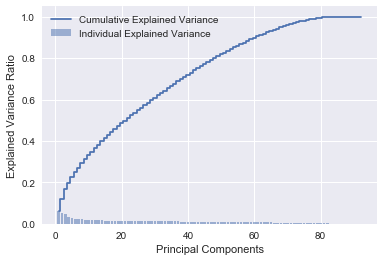

In [21]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,len(var_exp)+1), var_exp, alpha = 0.5, align = 'center',
        label = 'Individual Explained Variance')
plt.step(range(1,len(var_exp)+1), cum_var_exp, where='mid',
        label = 'Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

In [22]:
## Evaluation Techniques
##Try Majority Voting
from sklearn.base import BaseEstimator, clone
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.pipeline import _name_estimators
import numpy as np
import operator

class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    ''' A majority vote ensemble classifier
    Params:
        classifiers : array-like, shape = [n_classifiers]
            Different classifiers fro the ensemble
        
        vote : str, {'classlabel', 'probability'}
            Default 'classlabel'
            If 'classlabel' the prediction is based on 
            the argmax of class labels. Else if 'probability',
            the argmax of the sum of probabilities is used to 
            predict the class label (recommended for calibrated classifiers).
        
        weights : array-like, shape = [n_classifiers]
            Optional, default: None
            If a list of 'int' or 'float' values are provided,
            the classifiers are weighted by importance;
            Uses uniform weights if 'weights=None'.
        '''
    def __init__(self, classifiers,
                vote = 'classlabel', weights = None):
        self.classifiers = classifiers
        self.named_classifiers = {key: value for 
                                 key, value  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights
        
    def fit(self, X, y):
        ''' Fit classifiers.
        Params:
            X : {array-like, sparse matrix}, 
                shape = [n_samples, n_features]
                Matrix of training samples
            y : array-like, shape = [n_samples]
                Vector of target class labels.
        Returns
            self : Object
        '''
        # Use LabelEncoder to ensure class labels start with 0,
        # which is important for np.argmax, call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X,
                                       self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self
    
    def predict(self, X):
        ''' Predict class labels for X.
        Params
            X: {array-like, sparse matrix}
                Shape = [n_samples, n_features]
                Matrix of training samples.
        Returns
            maj_vote : array-like, shape = [n_samples]
                Predicted class labels.
        '''
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), 
                                axis = 1)
        else: # 'classlabel' vote
            # Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                     for clf in self.classifiers_]).T
            maj_vote = np.apply_along_axis(
                            lambda x:
                            np.argmax(np.bincount(x, weights=self.weights)),
                                      axis = 1,
                                      arr = predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote                            
        
    def predict_proba(self, X):
        ''' Predict class probabilities for X.
        Params:
            X : {array-like, sparse matrix}, 
                shape = [n_samples, n_features]
                Training vectors, where n_samples is 
                the number of samples and n_features is
                the number of features.
        Returns:
        avg_proba : array-like,
            shape = [n_samples, n_classes]
            Weighted average probability for 
            each class per sample.
        '''
        probas = np.asarray([clf.predict_proba(X)
                            for clf in self.classifiers_])
        avg_proba = np.average(probas,
                              axis = 0, weights = self.weights)
        return avg_proba

    def get_params(self, deep=True):
        ''' Get classifier parameters names for GridSearch'''
        if not deep:
            return super(MajorityVoteClassifier,
                        self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(
                        step.get_params(deep = True)):
                    out['%s_%s' % (name, key)] = value
            return out

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

names = ["Perceptron",
         "LogisticRegression",
         #"Linear SVM", 
         #"RBF SVM",          
         "Neural Net", 
         #"Naive Bayes",  
         #"Nearest Neighbors",
         "Decision Tree", 
         "Random Forest",
        "Majority Voting"] 


p1  = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components=60)),
                   ('clf', Perceptron())])
p2  = Pipeline([('scl', StandardScaler()),
                  ('pca', PCA(n_components=60)),
                    ('clf', LogisticRegression())])
# p3  = Pipeline([('scl', StandardScaler()),
#                    ('pca', PCA(n_components=5)),
#                     ('clf', SVC(kernel="linear", C=1))])
# p4  = Pipeline([('scl', StandardScaler()),
#                   ('pca', PCA(n_components=5)),
#                     ('clf', SVC(kernel='rbf',gamma=2, C=1))])
p5  = Pipeline([('scl', StandardScaler()),
                  ('pca', PCA(n_components=50)),
                   ('clf', MLPClassifier(hidden_layer_sizes=(100,50), alpha=1))])
# p6  = Pipeline([('scl', StandardScaler()),
#                   ('pca', PCA(n_components=5)),
#                    ('clf', GaussianNB())])
# p7  = Pipeline([('scl', StandardScaler()),
#                   ('pca', PCA(n_components=5)),
#                    ('clf', KNeighborsClassifier(5))])

clf8  = Pipeline([('scl', StandardScaler()),
                    ('clf',DecisionTreeClassifier(max_depth=5))])


clf9  = Pipeline([('scl', StandardScaler()),
                   ('clf',RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1))])


mv_clf = MajorityVoteClassifier(classifiers = [p1,p2,p5,clf8,clf9])
                                
clfs = [p1,p2,p5,clf8,clf9,mv_clf]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

for clf, name in zip(clfs, names):
    scores = cross_val_score(estimator = clf,
                            X = X_train,
                            y = y_train,
                            cv = 10,
                            scoring = 'accuracy')
    print('ROC AUC: %.2f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), name))

ROC AUC: 0.66 (+/- 0.04) [Perceptron]
ROC AUC: 0.76 (+/- 0.01) [LogisticRegression]
ROC AUC: 0.75 (+/- 0.01) [Neural Net]
ROC AUC: 0.77 (+/- 0.03) [Decision Tree]
ROC AUC: 0.75 (+/- 0.00) [Random Forest]
ROC AUC: 0.77 (+/- 0.01) [Majority Voting]


In [20]:
mv_clf.get_params()

{'pipeline-1': Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False)), ('clf', Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
       n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
       verbose=0, warm_start=False))]),
 'pipeline-1_clf': Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
       n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
       verbose=0, warm_start=False),
 'pipeline-1_clf__alpha': 0.0001,
 'pipeline-1_clf__class_weight': None,
 'pipeline-1_clf__eta0': 1.0,
 'pipeline-1_clf__fit_intercept': True,
 'pipeline-1_clf__n_iter': 5,
 'pipeline-1_clf__n_jobs': 1,
 'pipeline-1_clf__penalty': None,
 'pipeline-1_clf__random_state': 0,
 'pipeline-1_clf__shuffle': True,
 'pipeline-1_clf__verbose': 0,
 'pipeline-1_clf__warm_start': False,
 '

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'pipeline-1_clf__alpha': [0.001,0.1,1.0, 10.0],
          'pipeline-1_clf__penalty': ['l1','l2'],
          #'pipeline-2_clf__C':[0.001,0.1,1.0,10.0,100.0],
          'pipeline-2_clf__penalty': ['l1','l2'],
          'pipeline-3_clf__alpha': [0.001,0.1,1.0, 10.0],
          #'pipeline-3_clf__C':[0.001,0.1,100.0],
          'pipeline-3_clf__hidden_layer_sizes': [(100, 50),(100,100)],
          'pipeline-3_clf__learning_rate_init':[0.001,0.01,0.1,1.0,10.00]    
         }

gs = GridSearchCV(estimator = mv_clf,
                 param_grid = params,
                 scoring = 'accuracy',
                 cv = 3,
                 n_jobs = -1)
gs = gs.fit(X_train, y_train) 

print(gs.best_score_)
print(gs.best_estimator_)

In [24]:
for params, mean_score, scores in gs.grid_scores_:
    print('%.3f +/- %.2f %r' % (mean_score, scores.std()/2, params))

0.930 +/- 0.00 {'pipeline-2_clf__C': 0.001, 'pipeline-2_clf__penalty': 'l1', 'pipeline-3_clf__alpha': 0.001, 'pipeline-3_clf__hidden_layer_sizes': (100, 50)}
0.930 +/- 0.00 {'pipeline-2_clf__C': 0.001, 'pipeline-2_clf__penalty': 'l1', 'pipeline-3_clf__alpha': 0.001, 'pipeline-3_clf__hidden_layer_sizes': (100, 100)}
0.927 +/- 0.00 {'pipeline-2_clf__C': 0.001, 'pipeline-2_clf__penalty': 'l1', 'pipeline-3_clf__alpha': 0.1, 'pipeline-3_clf__hidden_layer_sizes': (100, 50)}
0.928 +/- 0.00 {'pipeline-2_clf__C': 0.001, 'pipeline-2_clf__penalty': 'l1', 'pipeline-3_clf__alpha': 0.1, 'pipeline-3_clf__hidden_layer_sizes': (100, 100)}
0.933 +/- 0.00 {'pipeline-2_clf__C': 0.001, 'pipeline-2_clf__penalty': 'l1', 'pipeline-3_clf__alpha': 1.0, 'pipeline-3_clf__hidden_layer_sizes': (100, 50)}
0.927 +/- 0.00 {'pipeline-2_clf__C': 0.001, 'pipeline-2_clf__penalty': 'l1', 'pipeline-3_clf__alpha': 1.0, 'pipeline-3_clf__hidden_layer_sizes': (100, 100)}
0.920 +/- 0.00 {'pipeline-2_clf__C': 0.001, 'pipeline-2_c

In [25]:
gs.grid_scores_

[mean: 0.92963, std: 0.00693, params: {'pipeline-2_clf__C': 0.001, 'pipeline-2_clf__penalty': 'l1', 'pipeline-3_clf__alpha': 0.001, 'pipeline-3_clf__hidden_layer_sizes': (100, 50)},
 mean: 0.92963, std: 0.00519, params: {'pipeline-2_clf__C': 0.001, 'pipeline-2_clf__penalty': 'l1', 'pipeline-3_clf__alpha': 0.001, 'pipeline-3_clf__hidden_layer_sizes': (100, 100)},
 mean: 0.92667, std: 0.00090, params: {'pipeline-2_clf__C': 0.001, 'pipeline-2_clf__penalty': 'l1', 'pipeline-3_clf__alpha': 0.1, 'pipeline-3_clf__hidden_layer_sizes': (100, 50)},
 mean: 0.92844, std: 0.00473, params: {'pipeline-2_clf__C': 0.001, 'pipeline-2_clf__penalty': 'l1', 'pipeline-3_clf__alpha': 0.1, 'pipeline-3_clf__hidden_layer_sizes': (100, 100)},
 mean: 0.93258, std: 0.00262, params: {'pipeline-2_clf__C': 0.001, 'pipeline-2_clf__penalty': 'l1', 'pipeline-3_clf__alpha': 1.0, 'pipeline-3_clf__hidden_layer_sizes': (100, 50)},
 mean: 0.92667, std: 0.00474, params: {'pipeline-2_clf__C': 0.001, 'pipeline-2_clf__penalty': 

In [26]:
print('Best parameters: %s' % gs.best_params_)

Best parameters: {'pipeline-2_clf__C': 1.0, 'pipeline-2_clf__penalty': 'l2', 'pipeline-3_clf__alpha': 0.1, 'pipeline-3_clf__hidden_layer_sizes': (100, 100)}


In [27]:
print('Accuracy: %.2f' % gs.best_score_)

Accuracy: 0.94
